In [1]:
import json

In [4]:
with open('new_york_datasets.json','r') as f:
    data = json.load(f)['results']

In [10]:
import pandas as pd

In [31]:
result = []
for dat in data:
    dataset = dat['resource']
    name = dataset['name']
    col_names = dataset['columns_name']
    col_field_names = dataset['columns_field_name']
    col_type = dataset['columns_datatype']
    col_desc = dataset['columns_description']
    
    for i, col_name in enumerate(col_names):
        result.append({'datasaet_name':name, 'col_name': col_name, 'col_field_name': col_field_names[i], 'col_type': col_type[i], 'col_desc': col_desc[i]})
        
result= pd.DataFrame(result)

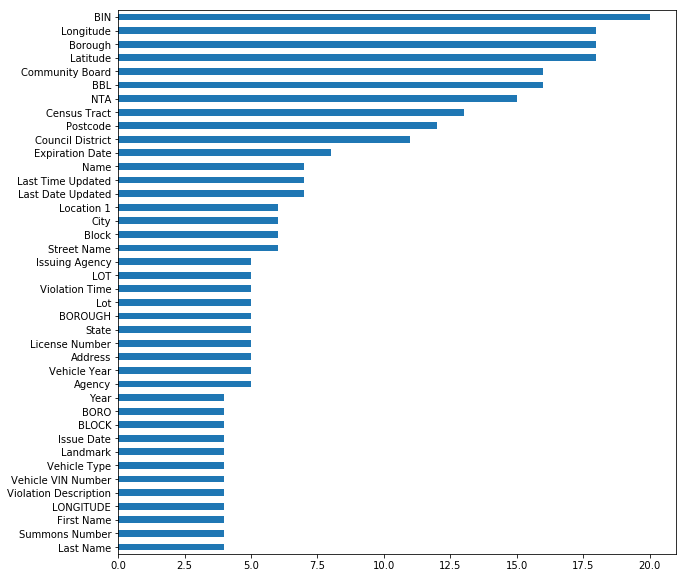

In [55]:
result.col_name.value_counts().sort_values(ascending=True).tail(40).plot(kind='barh',figsize=(10,10))